In [1]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_circles
from matplotlib.pylab import plt
from pandas import DataFrame
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

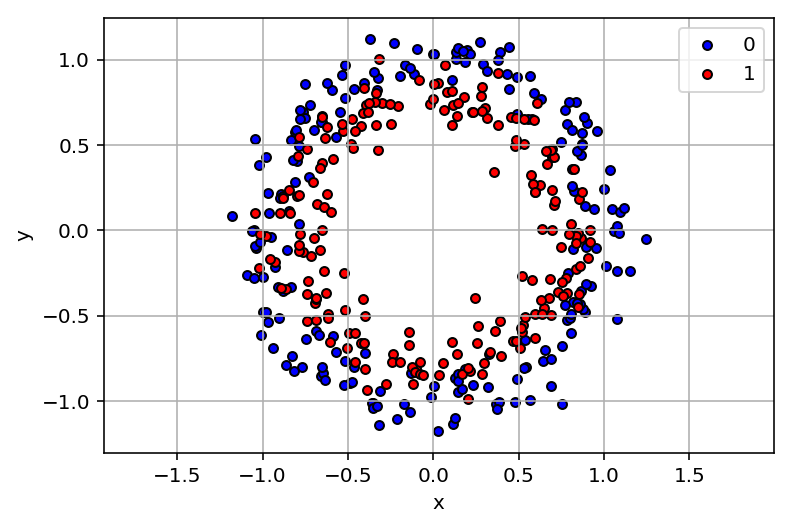

In [2]:
# generate 2d classification dataset
xy, labels = make_circles(n_samples=400, noise=0.1, random_state=410)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels))
colors = {1:'red', 0:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key], edgecolor='k')
plt.axis('equal')
plt.grid()
plt.show()

In [3]:
features = np.array([[xval, yval] for xval, yval in xy])
labels = labels.reshape(-1,1)

## Neural Network

모델 구성은 다음과 같습니다.

1. Hidden Layer 1 : $h_1 = \sigma(xW_1 + b_1) $
1. Hidden Layer 2 : $h_2 = \sigma(h_1W_2 + b_2) $
1. Output Layer : $\hat{y} = \sigma(h_2W_3 + b_3)  $

아래 Hyper-Parameter 및 함수를 사용하여 정의하시면 됩니다.

* `num_hidden1` : 10
* `num_hidden2` : 4
* `activation` : `tf.nn.sigmoid`

이미 만들어진, Hidden Layer 1을 보고 Hidden Layer 2와 Output Layer를 만드는 코드를 작성하시면 됩니다.

1. `tf.layers.dense(input, units = , use_bias = , activation = )` 사용하여 Hidden Layer 2 만들기
1. `tf.layers.dense(input, units = , use_bias = , activation = )` 사용하여 Output Layer 만들기

In [4]:
num_hidden1 = 10
num_hidden2 = 4
tf.set_random_seed(180410)
x = tf.placeholder(tf.float32, [None, 2])

hidden1 = tf.layers.dense(x, units=num_hidden1, use_bias=True, activation=tf.nn.sigmoid)
# TODO 1
hidden2 = tf.layers.dense(hidden1, units=num_hidden2, use_bias=True, activation=tf.nn.sigmoid)
# TODO 2
model = tf.layers.dense(hidden2, units=1, use_bias=True, activation=tf.nn.sigmoid)

## Binary Classification

loss function을 Cross-Entropy로 만들기
$$
loss = \frac{1}{m}\sum_{i=1}^m -y_i \log(\hat{y_i})-(1-y_i) \log(1-\hat{y_i})
$$

In [5]:
y = tf.placeholder(tf.float32, [None, 1])

# TODO 3
loss = tf.reduce_mean(-y * tf.log(model) - (1 - y) * tf.log(1 - model))

train = tf.train.AdamOptimizer().minimize(loss)

## Gradient Descent

In [6]:
def plot_model(sess, model):
    xx, yy = np.meshgrid(np.linspace(-1.5,1.5), np.linspace(-1.5,1.5))
    prediction = sess.run(model, feed_dict={x: np.array([[xxval, yyval] for xxval, yyval in zip(xx.flatten(), yy.flatten())])})
    Z = prediction.reshape(xx.shape)
    df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels.flatten()))
    colors = {1:'red', 0:'blue'}
    _, ax = plt.subplots(figsize=(5, 5))
    ax.contourf(xx, yy, Z, cmap='coolwarm', alpha=.9,)
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key], edgecolor='k')
    ax.set_xlim([-1.3, 1.3])
    ax.set_ylim([-1.3, 1.3])
    plt.grid()
    plt.show()

0 0.6978634


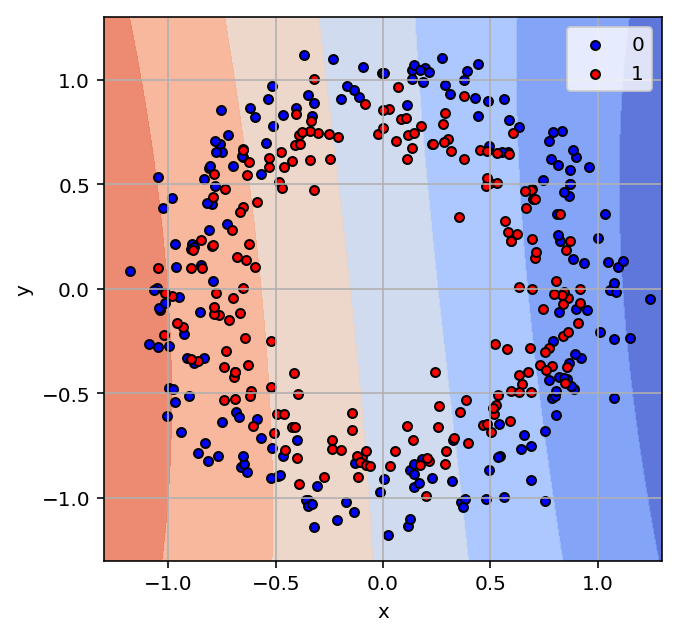

2000 0.4227462


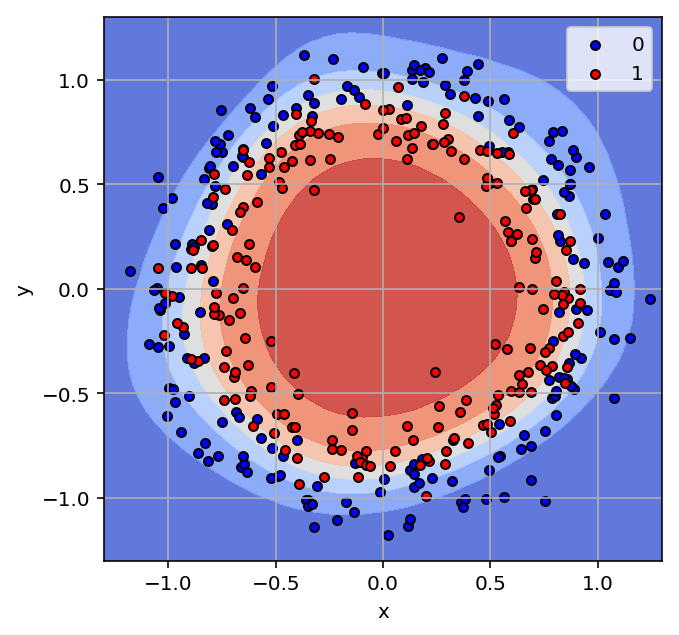

4000 0.31934667


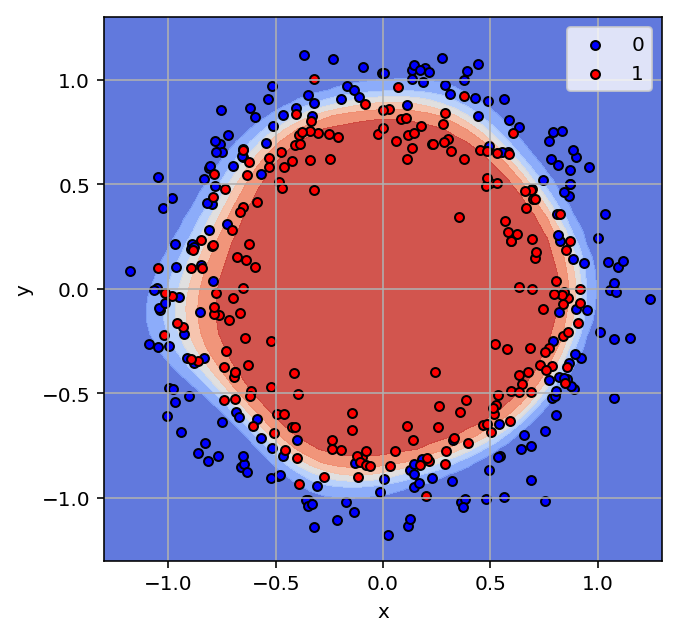

6000 0.30806696


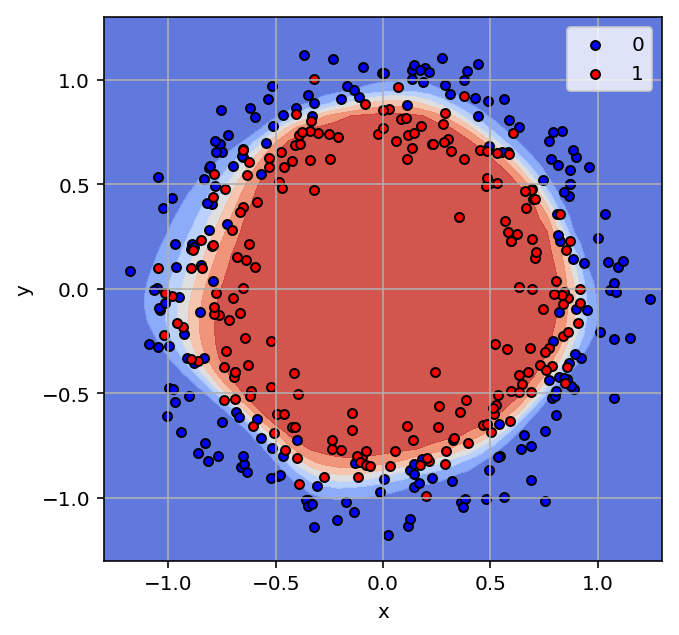

8000 0.2972228


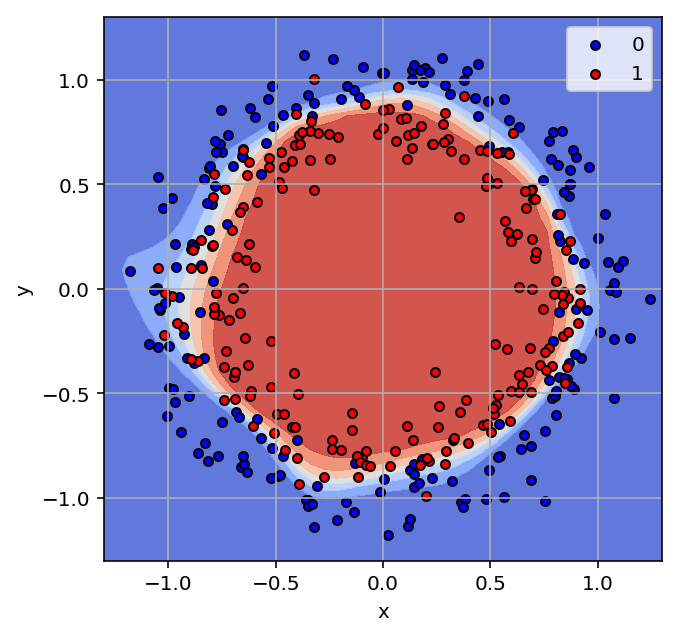

10000 0.28599972


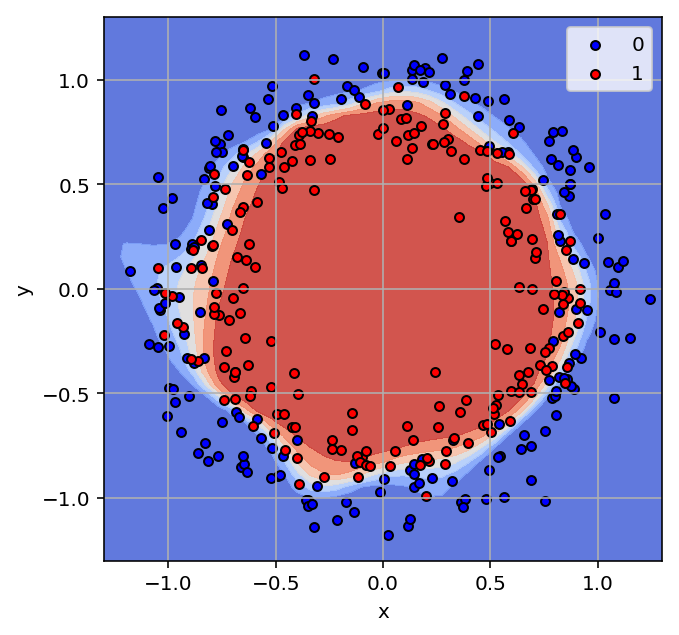

In [7]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for epoch in range(10001):
    sess.run(train, feed_dict={x : features, y:labels})
    if epoch % 2000 == 0:
        curr_loss = sess.run(loss, feed_dict={x : features, y:labels})
        print(epoch, curr_loss)
        plot_model(sess, model)

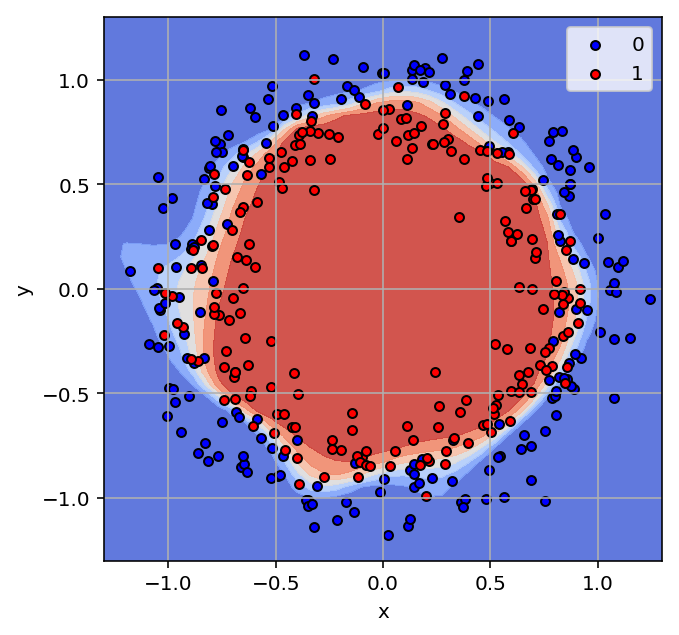

In [8]:
plot_model(sess, model)